In [78]:
import pandas as pd

# for adaboost
from sklearn.ensemble import AdaBoostClassifier

# for xgboost
from xgboost import XGBClassifier

# for evaluation metrics
%run -i helper_functions.py

# for multi-label classification
from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset

# for plotting graph
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle

import warnings
warnings.filterwarnings("ignore")

## Read Data

In [2]:
selected_train = pd.read_csv('Data\selected_train.csv')

In [3]:
print(selected_train.shape)
selected_train.head()

(159571, 48)


,toxic,severe_toxic,obscene,threat,insult,identity_hate,none,min_length_scaled,num_words_vs_length,exclamation_marks_vs_length,...,105,114,132,135,139,143,156,157,170,198
0,0,0,0,0,0,0,1,0.009393,0.181132,0.000000,...,-0.091320,-0.017755,0.003997,-0.199211,-0.109984,0.089084,0.012651,-0.019501,-0.091946,-0.113697
1,0,0,0,0,0,0,1,0.000723,0.160714,0.008929,...,-0.118445,0.039541,0.017522,0.001397,0.000094,0.021135,0.039308,-0.067295,-0.079366,-0.044959
2,0,0,0,0,0,0,1,0.007225,0.188841,0.000000,...,-0.131555,-0.060714,0.026459,-0.029582,-0.146134,0.109907,0.036539,-0.053628,0.027530,-0.211230
3,0,0,0,0,0,0,1,0.007948,0.175719,0.000000,...,-0.145382,-0.004285,-0.000706,-0.134984,-0.214832,0.177560,0.007675,-0.087473,0.106848,-0.015987
4,0,0,0,0,0,0,1,0.003613,0.208955,0.000000,...,0.007073,-0.204627,0.162032,0.013798,-0.221076,0.163578,-0.068310,-0.031184,-0.017280,0.038566


In [8]:
features = selected_train.columns[7:]

In [9]:
labels = selected_train.columns[:6]

## Adaboost

### Baseline Adaboost using BinaryRelevance

In [66]:
classifier_ab = BinaryRelevance(AdaBoostClassifier(random_state=0))
scores_ab = model_evaluation(classifier_ab, selected_train)

Starting fitting...
Evaluation Scores:
[0.9086009713300955, 0.7662075024631361, 0.5955355889372456, 0.668614831071146, 0.39369639966892334, 0.9644349748310285]

Starting fitting...
Evaluation Scores:
[0.9115748574293413, 0.7595417714523536, 0.5947721754035138, 0.6661630929909684, 0.38696189906549155, 0.9625646922464547]

Starting fitting...
Evaluation Scores:
[0.9124208811180047, 0.7719679475126819, 0.5987742303306728, 0.6733192558041735, 0.3877950753399316, 0.9646503826264773]

Starting fitting...
Evaluation Scores:
[0.9121388732217836, 0.7637796278111846, 0.6064349324906636, 0.6747315236135966, 0.3847270115759182, 0.9653717914010013]

Starting fitting...
Evaluation Scores:
[0.9113241837438115, 0.7665321644718834, 0.5914808461978274, 0.666324875262268, 0.38644634243444553, 0.9615207163393116]



In [67]:
scores_ab

,accuracy,precision_weighted,recall_weighted,f1_weighted,log_loss,roc_auc_weighted
0,0.908601,0.766208,0.595536,0.668615,0.393696,0.964435
1,0.911575,0.759542,0.594772,0.666163,0.386962,0.962565
2,0.912421,0.771968,0.598774,0.673319,0.387795,0.964650
3,0.912139,0.763780,0.606435,0.674732,0.384727,0.965372
4,0.911324,0.766532,0.591481,0.666325,0.386446,0.961521


### Baseline Adaboost using ClassifierChain

In [68]:
classifier_chain_ab = ClassifierChain(AdaBoostClassifier(random_state=0))
scores_chain_ab = model_evaluation(classifier_chain_ab, selected_train)

Starting fitting...
Evaluation Scores:
[0.9104809650634498, 0.7384635533740987, 0.6317562824652534, 0.6745848669974185, 0.38961003115342546, 0.962411850840173]

Starting fitting...
Evaluation Scores:
[0.9135802469135802, 0.7443306616884929, 0.630624196543351, 0.6777138181688405, 0.38273790835086247, 0.959051054485923]

Starting fitting...
Evaluation Scores:
[0.9140502600739487, 0.7423848777398544, 0.6328392246294184, 0.6789176970840937, 0.38458337339085846, 0.9624953997128569]

Starting fitting...
Evaluation Scores:
[0.9142695995487874, 0.7382283902076263, 0.6430623384085034, 0.6809014825232593, 0.38158460910319736, 0.9630270816800737]

Starting fitting...
Evaluation Scores:
[0.9120135363790186, 0.7332005622547857, 0.6179245283018868, 0.664510165034994, 0.3831426565262774, 0.9589690169502456]



In [69]:
scores_chain_ab

,accuracy,precision_weighted,recall_weighted,f1_weighted,log_loss,roc_auc_weighted
0,0.910481,0.738464,0.631756,0.674585,0.389610,0.962412
1,0.913580,0.744331,0.630624,0.677714,0.382738,0.959051
2,0.914050,0.742385,0.632839,0.678918,0.384583,0.962495
3,0.914270,0.738228,0.643062,0.680901,0.381585,0.963027
4,0.912014,0.733201,0.617925,0.664510,0.383143,0.958969


### Baseline Adaboost using LabelPowerset

In [79]:
classifier_powerset_ab = LabelPowerset(AdaBoostClassifier(random_state=0))
scores_powerset_ab = model_evaluation(classifier_powerset_ab, selected_train)

Starting fitting...
Evaluation Scores:
[0.9053736487545041, 0.6677506312056952, 0.5581917731292995, 0.5854594659690138, 0.35570806817067546, 0.6347150990441058]

Starting fitting...
Evaluation Scores:
[0.9076580810929372, 0.6431143422721008, 0.5529210112841023, 0.5799529715728086, 0.3498014256219885, 0.6349043525231085]

Starting fitting...
Evaluation Scores:
[0.9091307889954252, 0.6454889342128035, 0.5598631698973774, 0.586580718275678, 0.35062982799065884, 0.7774015124659068]

Starting fitting...
Evaluation Scores:
[0.9084101021495269, 0.6430638661285608, 0.579000287273772, 0.5944230626491557, 0.3476874498135715, 0.8144218452109794]

Starting fitting...
Evaluation Scores:
[0.9075954126715549, 0.6378459940551113, 0.5494568324757004, 0.5762969032355197, 0.34958268902469014, 0.7666243470092258]



In [80]:
scores_powerset_ab

,accuracy,precision_weighted,recall_weighted,f1_weighted,log_loss,roc_auc_weighted
0,0.905374,0.667751,0.558192,0.585459,0.355708,0.634715
1,0.907658,0.643114,0.552921,0.579953,0.349801,0.634904
2,0.909131,0.645489,0.559863,0.586581,0.350630,0.777402
3,0.908410,0.643064,0.579000,0.594423,0.347687,0.814422
4,0.907595,0.637846,0.549457,0.576297,0.349583,0.766624


### Store the Result

In [81]:
scores_collection = pd.DataFrame({'model name': [], 'accuracy':[], 'precision_weighted':[], 'recall_weighted':[], 
                                      'f1_weighted':[], 'log_loss':[], 'roc_auc_weighted':[]})
scores_collection.loc[len(scores_collection)] = ['Adaboost with BinaryRelevance']+np.mean(scores_ab).values.tolist()
scores_collection.loc[len(scores_collection)] = ['Adaboost with ClassifierChain']+np.mean(scores_chain_ab).values.tolist()
scores_collection.loc[len(scores_collection)] = ['Adaboost with LabelPowerset']+np.mean(scores_powerset_ab).values.tolist()

In [82]:
scores_collection

,model name,accuracy,precision_weighted,recall_weighted,f1_weighted,log_loss,roc_auc_weighted
0,Adaboost with BinaryRelevance,0.911212,0.765606,0.597400,0.669831,0.387925,0.963709
1,Adaboost with ClassifierChain,0.912879,0.739322,0.631241,0.675326,0.384332,0.961191
2,Adaboost with LabelPowerset,0.907634,0.647453,0.559887,0.584543,0.350682,0.725613


In [83]:
scores_collection.to_csv('Adaboost Evaluation.csv', index=False)

## XGBoost

### Baseline XGboost using BinaryRelevance

In [84]:
classifier = BinaryRelevance(XGBClassifier(random_state=0))
scores = model_evaluation(classifier, selected_train)

Starting fitting...
Evaluation Scores:
[0.9122042926523578, 0.7816063048015643, 0.6157517899761337, 0.6812803217564825, 0.30311929482937344, 0.9691228463362997]

Starting fitting...
Evaluation Scores:
[0.913956257441875, 0.775332719800784, 0.6209112983859448, 0.6842053569919233, 0.3002826977999725, 0.9682922228086048]

Starting fitting...
Evaluation Scores:
[0.9142382653380962, 0.7840266258327895, 0.6171607753705816, 0.6866179223396542, 0.29878448984750555, 0.969393172978163]

Starting fitting...
Evaluation Scores:
[0.9140189258632575, 0.7726031593106027, 0.6275495547256535, 0.6860623726746115, 0.29334597513512106, 0.9698589329401419]

Starting fitting...
Evaluation Scores:
[0.9141755969167137, 0.7853242051054249, 0.6112064036592338, 0.6801881994469983, 0.29942039557093086, 0.9676201403555271]



In [85]:
scores

,accuracy,precision_weighted,recall_weighted,f1_weighted,log_loss,roc_auc_weighted
0,0.912204,0.781606,0.615752,0.681280,0.303119,0.969123
1,0.913956,0.775333,0.620911,0.684205,0.300283,0.968292
2,0.914238,0.784027,0.617161,0.686618,0.298784,0.969393
3,0.914019,0.772603,0.627550,0.686062,0.293346,0.969859
4,0.914176,0.785324,0.611206,0.680188,0.299420,0.967620


### Baseline XGboost using ClassifierChain

In [86]:
classifier_chain = ClassifierChain(XGBClassifier(random_state=0))
scores_chain = model_evaluation(classifier_chain, selected_train)

Starting fitting...
Evaluation Scores:
[0.913551621494595, 0.7741440888491323, 0.623473255650709, 0.6821252198236516, 0.3188316024696583, 0.9664655496214329]

Starting fitting...
Evaluation Scores:
[0.9160869837688789, 0.7692444774183113, 0.6286244822168262, 0.6870644446258796, 0.3171231860418646, 0.9646724180500736]

Starting fitting...
Evaluation Scores:
[0.9153349627122893, 0.7700589696428158, 0.625, 0.6867302991965881, 0.3156200285785689, 0.9665555795549194]

Starting fitting...
Evaluation Scores:
[0.9143636021808611, 0.760653703904997, 0.6295604711289859, 0.6829914227605772, 0.30862154660326174, 0.9672090674451844]

Starting fitting...
Evaluation Scores:
[0.9153662969229805, 0.7722064071288528, 0.6166380789022299, 0.6792521022479362, 0.3147904005062823, 0.9657288867117968]



In [87]:
scores_chain

,accuracy,precision_weighted,recall_weighted,f1_weighted,log_loss,roc_auc_weighted
0,0.913552,0.774144,0.623473,0.682125,0.318832,0.966466
1,0.916087,0.769244,0.628624,0.687064,0.317123,0.964672
2,0.915335,0.770059,0.625000,0.686730,0.315620,0.966556
3,0.914364,0.760654,0.629560,0.682991,0.308622,0.967209
4,0.915366,0.772206,0.616638,0.679252,0.314790,0.965729


### Baseline XGboost using LabelPowerset

In [88]:
classifier_powerset = LabelPowerset(XGBClassifier(random_state=0))
scores_powerset = model_evaluation(classifier_powerset, selected_train)

Starting fitting...
Evaluation Scores:
[0.913551621494595, 0.7886307314036036, 0.5854274884178015, 0.6627241674562832, 0.2991999907091637, 0.9692827620194534]

Starting fitting...
Evaluation Scores:
[0.915710973240584, 0.7835093741014033, 0.5854877874589345, 0.663764093060638, 0.2976503302134648, 0.9688261230358908]

Starting fitting...
Evaluation Scores:
[0.9155543021871279, 0.7880420341229604, 0.5826681870011402, 0.665235962384219, 0.296214464739103, 0.969837625533304]

Starting fitting...
Evaluation Scores:
[0.9147396127091558, 0.7810521687662786, 0.5876185004309107, 0.6629747526205353, 0.2923570640952608, 0.9699821278087527]

Starting fitting...
Evaluation Scores:
[0.915836310083349, 0.7934901424374533, 0.5767581475128645, 0.6586721535047388, 0.2978230606621134, 0.9678937761840546]



In [89]:
scores_powerset

,accuracy,precision_weighted,recall_weighted,f1_weighted,log_loss,roc_auc_weighted
0,0.913552,0.788631,0.585427,0.662724,0.299200,0.969283
1,0.915711,0.783509,0.585488,0.663764,0.297650,0.968826
2,0.915554,0.788042,0.582668,0.665236,0.296214,0.969838
3,0.914740,0.781052,0.587619,0.662975,0.292357,0.969982
4,0.915836,0.793490,0.576758,0.658672,0.297823,0.967894


### Tuned XGboost using BinaryRelevance

In [90]:
classifier_tuned = BinaryRelevance(XGBClassifier(random_state=0, scale_pos_weight=5, max_depth=8, min_child_weight=3, gamma=0.4, colsample_bytree=1.0, subsample=1.0))
scores_tuned = model_evaluation(classifier_tuned, selected_train)

Starting fitting...
Evaluation Scores:
[0.9044649851167162, 0.7100292903888247, 0.6880527867471571, 0.6941366744695618, 0.31193962050409996, 0.9667679041429755]

Starting fitting...
Evaluation Scores:
[0.9047126652879613, 0.7000787282465984, 0.6906156263390945, 0.6920351408849984, 0.308261273953566, 0.965978553738484]

Starting fitting...
Evaluation Scores:
[0.9057780284514633, 0.709406006095975, 0.6948403648802737, 0.6997989373638552, 0.3064104299024056, 0.967665626993013]

Starting fitting...
Evaluation Scores:
[0.9052453468697124, 0.6997399863033013, 0.6986498132720482, 0.6940240845745991, 0.3009386737120249, 0.9671290201726321]

Starting fitting...
Evaluation Scores:
[0.9044306573917403, 0.7075713232056231, 0.6869639794168096, 0.6919286256563177, 0.3095397614697667, 0.9652824069171213]



In [91]:
scores_tuned

,accuracy,precision_weighted,recall_weighted,f1_weighted,log_loss,roc_auc_weighted
0,0.904465,0.710029,0.688053,0.694137,0.311940,0.966768
1,0.904713,0.700079,0.690616,0.692035,0.308261,0.965979
2,0.905778,0.709406,0.694840,0.699799,0.306410,0.967666
3,0.905245,0.699740,0.698650,0.694024,0.300939,0.967129
4,0.904431,0.707571,0.686964,0.691929,0.309540,0.965282


### Store the Result

In [94]:
scores_collection2 = pd.DataFrame({'model name': [], 'accuracy':[], 'precision_weighted':[], 'recall_weighted':[], 
                                      'f1_weighted':[], 'log_loss':[], 'roc_auc_weighted':[]})
scores_collection2.loc[len(scores_collection2)] = ['XGBoost with BinaryRelevance']+np.mean(scores).values.tolist()
scores_collection2.loc[len(scores_collection2)] = ['XGBoost with ClassifierChain']+np.mean(scores_chain).values.tolist()
scores_collection2.loc[len(scores_collection2)] = ['XGBoost with LabelPowerset']+np.mean(scores_powerset).values.tolist()
scores_collection2.loc[len(scores_collection2)] = ['Tuned XGBoost with BinaryRelevance']+np.mean(scores_tuned).values.tolist()

In [95]:
scores_collection2

,model name,accuracy,precision_weighted,recall_weighted,f1_weighted,log_loss,roc_auc_weighted
0,XGBoost with BinaryRelevance,0.913719,0.779779,0.618516,0.683671,0.298991,0.968857
1,XGBoost with ClassifierChain,0.914941,0.769262,0.624659,0.683633,0.314997,0.966126
2,XGBoost with LabelPowerset,0.915079,0.786945,0.583592,0.662674,0.296649,0.969164
3,Tuned XGBoost with BinaryRelevance,0.904926,0.705365,0.691825,0.694385,0.307418,0.966565


In [96]:
scores_collection2.to_csv('XGBoost Evaluation.csv', index=False)

## Visualization

In [121]:
scores_collection_combined = scores_collection.append(scores_collection2).reset_index(drop=True)

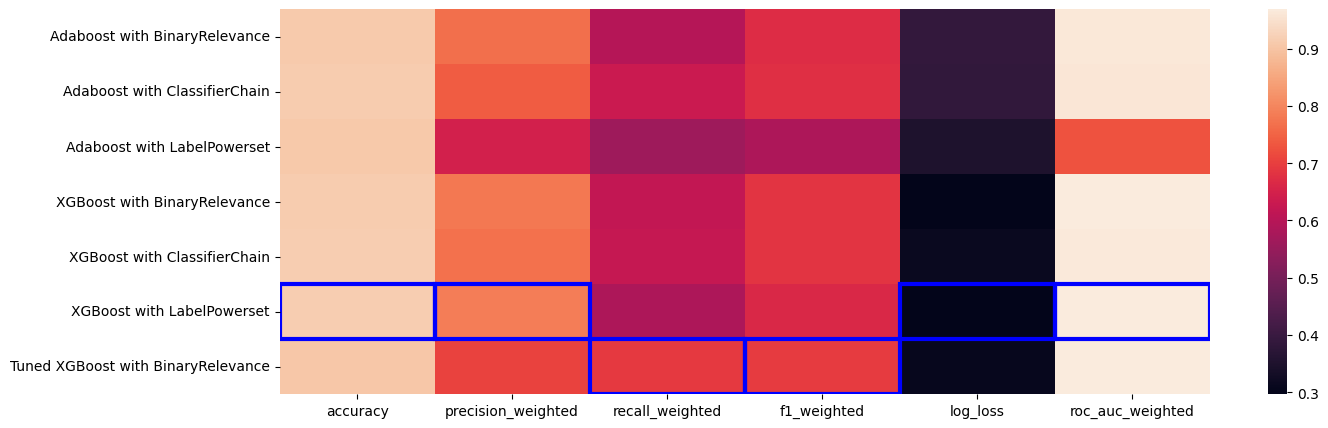

In [122]:
# identify the best performance for each evaluation score
fig,ax = plt.subplots(figsize=(15, 5), facecolor='w', edgecolor='k')
ax = sns.heatmap(scores_collection_combined.drop('model name', axis=1), yticklabels=scores_collection_combined['model name'])
column_best = scores_collection_combined.drop('model name', axis=1).idxmax(axis=0)
column_best['log_loss'] = scores_collection_combined['log_loss'].idxmin(axis=0)

for col, variable in enumerate(scores_collection_combined.columns[1:]):
    position = scores_collection_combined.index.get_loc(column_best[variable])
    ax.add_patch(Rectangle((col, position),1,1, fill=False, edgecolor='blue', lw=3))